In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [6]:
df = pd.read_csv("1_boston_housing.csv")
# df = pd.read_csv(r"C:\Users\Desktop\1_boston_housing.csv")


In [21]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
# y = df[['MEDV']]


In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 642.8945 - mae: 23.4028 - val_loss: 598.6031 - val_mae: 22.5122
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 575.4178 - mae: 21.8843 - val_loss: 537.9031 - val_mae: 21.0756
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 491.3534 - mae: 19.8560 - val_loss: 441.6092 - val_mae: 18.5480
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 357.2238 - mae: 16.4939 - val_loss: 307.5655 - val_mae: 14.3614
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 251.2482 - mae: 12.8145 - val_loss: 182.0849 - val_mae: 9.6480
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 159.5996 - mae: 9.9312 - val_loss: 131.8966 - val_mae: 8.3629
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 144.9353 - mae: 9.2705 - val_loss: 119.9039 - val_mae: 8.0470
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 107.2571 - mae: 7.8959 - val_loss: 112.9780 - val_mae: 7.5844
Epoch 9/100
11/11

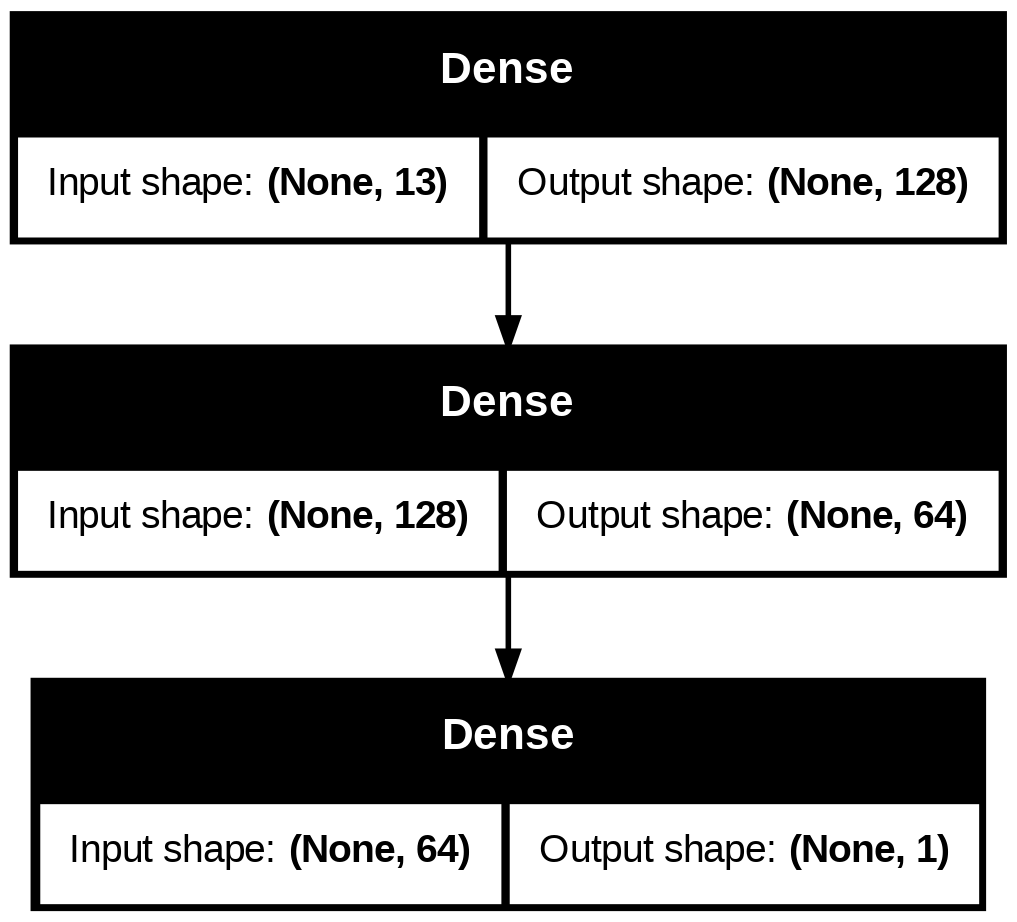

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)



In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

In [18]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

from sklearn.metrics import r2_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print('R-squared on test data: ', r2)
print('rescore')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.3011 - mae: 3.3355 
Mean squared error on test data:  21.79509162902832
Mean absolute error on test data:  3.02535343170166
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R-squared on test data:  0.730352520942688
rescore


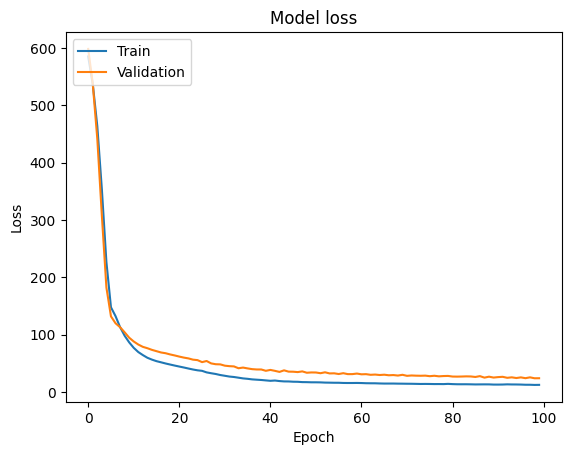

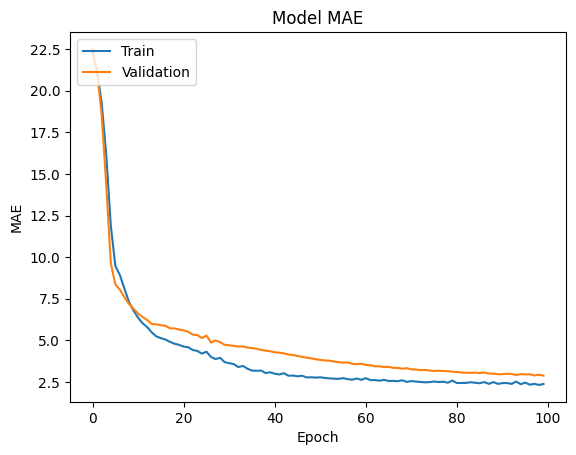

In [15]:


import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
df.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')